I want to produce a scatter plot to see if the tags that produce more than two alleles in a single genotype are randomly distributed across tags or occur only in a subset of tags.

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2/

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [18]:
hapfile = open("batch_100.haplotypes.tsv","r")
lines = hapfile.readlines()
headerline = lines[0]
restlines = lines[1:]
hapfile.close()

locus_list = []
for line in restlines:
    linelist = line.strip().split()
    locus = linelist[0]
    locus_list.append(locus)
inc_list = [0]*len(locus_list)

# to get snps in each haplotype, initiate list
hap_lengths = []
num_alleles_list = []

missvals_count = 0 # initiate counter for genotypes with missing data
dip_count = 0 # inidiate counter for diploid genotypes
for i in range(0,len(restlines)):
    line = restlines[i]
    linelist = line.strip().split()
    genotypelist = linelist[2:]
    tag_hap_lengths = []
    for genotype in genotypelist:
        splitgen = genotype.split("/")
        hap_length = len(splitgen[0])
        tag_hap_lengths.append(hap_length)
        if splitgen[0] == "-":
            missvals_count += 1
        elif len(splitgen) == 2:
            dip_count += 1
        elif len(splitgen) > 2:
            oldcount = inc_list[i]
            newcount = oldcount + 1
            inc_list[i] = newcount
            num_alleles = len(splitgen)
            num_alleles_list.append(num_alleles)
    hap_length = max(tag_hap_lengths)
    hap_lengths.append(hap_length)
    
total_gens = len(num_alleles_list) + missvals_count + dip_count

perc_miss = float(missvals_count)/float(total_gens)*100
perc_dip = float(dip_count)/float(total_gens)*100
perc_poly = float(len(num_alleles_list))/float(total_gens)*100

print "Percent of genotypes with missing values: " + str(perc_miss)[0:5] + "%"
print "Percent of genotypes with diploid genotypes: " + str(perc_dip)[0:5] + "%"
print "Percent of genotypes with polyploid genotypes: " + str(perc_poly)[0:5] + "%"

Percent of genotypes with missing values: 13.12%
Percent of genotypes with diploid genotypes: 76.28%
Percent of genotypes with polyploid genotypes: 10.59%


In [7]:
# check hap lengths list
print hap_lengths[0:19]

[4, 9, 7, 11, 17, 2, 7, 4, 5, 1, 1, 18, 9, 10, 6, 5, 5, 7, 7]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

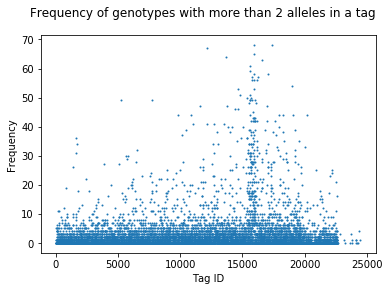

In [30]:
plt.scatter(locus_list,inc_list, s=1)
plt.suptitle("Frequency of genotypes with more than 2 alleles in a tag")
plt.xlabel("Tag ID")
plt.ylabel("Frequency")
plt.show()

I was hoping to see large patches without points, but they look pretty evenly distributed to me. It is weird to see this bar around tags 16,000.

## Incidence of polyploid genotypes against num SNPs in tag

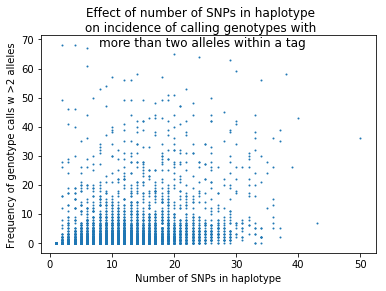

In [18]:
plt.scatter(hap_lengths,inc_list, s=1)
plt.suptitle("Effect of number of SNPs in haplotype \non incidence of calling genotypes with \nmore than two alleles within a tag")
plt.xlabel("Number of SNPs in haplotype")
plt.ylabel("Frequency of genotype calls w >2 alleles")
plt.show()

Correlation:

In [3]:
import numpy

In [16]:
numpy.corrcoef(hap_lengths, inc_list)[0,1]

0.31643490084583625

That's not very big at all.

## Histogram of number of alleles in an individual genotype, for those that have >2 alleles

I wanted to see how many extra alleles genotypes have, so I took the number of alleles within individual genotypes and made a histogram. Looks like what we'd expect due to sequencing error, although there is probably also a biological explanation. Looks like the vast majority of genotypes have 2-4 alleles, which is consistent with gene duplication or sequencing error. However, looking at the plot above, it looks like the cause is not gene duplication, otherwise I'd expect a subset of tags to contain most of the genotypes with multiple alleles. Although there is that interesting bar in the plot, it does look mostly random otherwise.

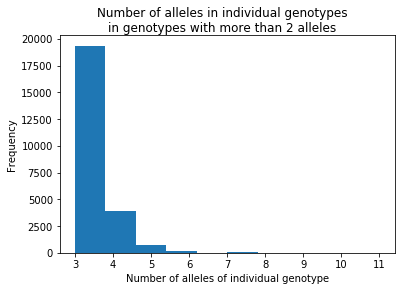

In [20]:
plt.hist(num_alleles_list)
plt.suptitle("Number of alleles in individual genotypes\nin genotypes with more than 2 alleles")
plt.xlabel("Number of alleles of individual genotype")
plt.ylabel("Frequency")
plt.show()